In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 4 notebook

In [2]:
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))

print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))

print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

mpl.rcParams.update({'font.size': 16})

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 4B/C: Individual posterior meal values of fullness dependent and fullness independent meal termination parameters coloured by (B) treatment group and (C) normalised food intake

3.507358484566017 0.4227033591825634
1.0526696836876217 2.0059330803808115
1.0689918648131849 0.7969423118309507
2.090402011689581 0.5717131035304454
-0.16193685497106675 0.4275332127827624


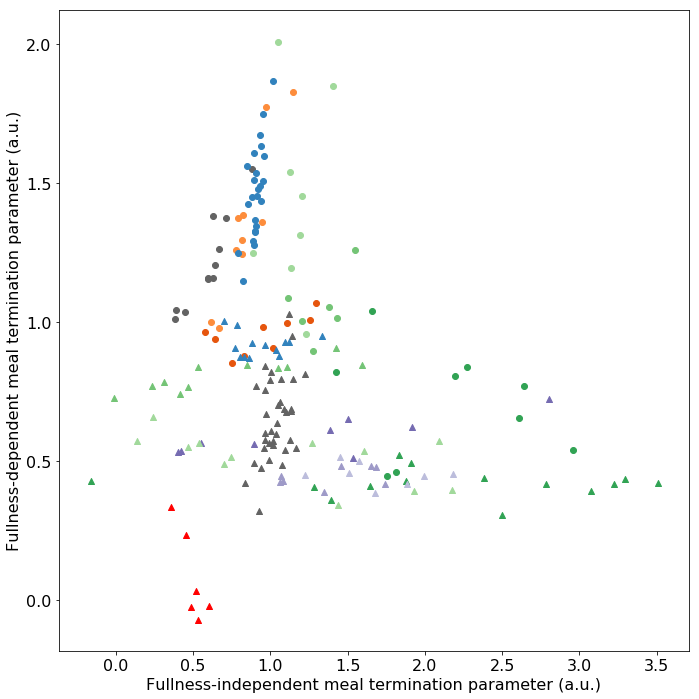

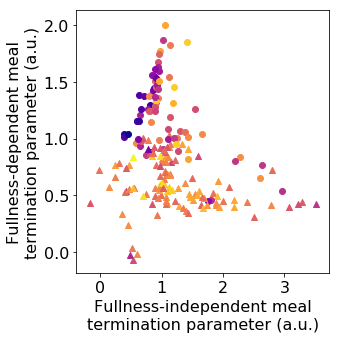

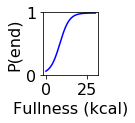

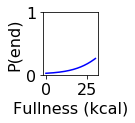

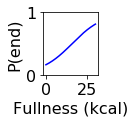

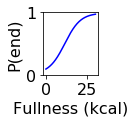

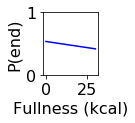

In [3]:
reload(plots)
reload(helpers)

## Main plot
fig, axes = plots.pairplot(df, 'theta4', 'theta5', ctype='drug_c', figsize=(10,10))
axes.set_xlabel('Fullness-independent meal termination parameter (a.u.)')
axes.set_ylabel('Fullness-dependent meal termination parameter (a.u.)')

## Save figure
fig.tight_layout()
plt.savefig('figures/4A.svg')

## With second colouring
fig2, axes2 = plots.pairplot(df, 'theta4', 'theta5', ctype='rate_c')
axes2.set_xlabel('Fullness-independent meal\ntermination parameter (a.u.)')
axes2.set_ylabel('Fullness-dependent meal\ntermination parameter (a.u.)')

## Save figure
fig2.tight_layout()
plt.savefig('figures/4B.svg')

"""
axes.set_xlim([0, 3])
axes.set_ylim([0, 2.5])

axes2.set_xlim([0, 3])
axes2.set_ylim([0, 2.5])
"""
## Inset for max theta4
sorted_df = df.sort_values('theta4', ascending=False)
theta4 = sorted_df.iloc[0]['theta4']
theta5 = sorted_df.iloc[0]['theta5']
print theta4, theta5
fig3, axes3 = plots.termination_given_params(theta4, theta5)
axes3.set_ylim([0, 1])
axes3.set_xlabel('Fullness (kcal)')
axes3.set_ylabel('P(end)')

## Save figure
fig3.tight_layout()
plt.savefig('figures/4A_inset1.svg')

## Inset for max theta5
sorted_df = df.sort_values('theta5', ascending=False)
theta4 = sorted_df.iloc[0]['theta4']
theta5 = sorted_df.iloc[0]['theta5']
print theta4, theta5
fig4, axes4 = plots.termination_given_params(theta4, theta5)
axes4.set_ylim([0, 1])
axes4.set_xlabel('Fullness (kcal)')
axes4.set_ylabel('P(end)')

## Save figure
fig4.tight_layout()
plt.savefig('figures/4A_inset2.svg')

## Axes for ad libitum saline in dark period
use_df = df[df['drug'] == 'saline']
use_df = use_df[use_df['adlib'] == 'A']
use_df = use_df[use_df['period'] == 'D']
sorted_df = use_df.sort_values('theta5', ascending=False)
theta4 = sorted_df.iloc[5]['theta4']
theta5 = sorted_df.iloc[5]['theta5']
print theta4, theta5
fig5, axes5 = plots.termination_given_params(theta4, theta5)
axes5.set_ylim([0, 1])
#axes.scatter(theta4, theta5, c='k', s=20) # use this to find the point
axes5.set_xlabel('Fullness (kcal)')
axes5.set_ylabel('P(end)')

## Save figure
fig5.tight_layout()
plt.savefig('figures/4A_inset3.svg')

## Axes for high but not max theta4
sorted_df = df.sort_values('theta4', ascending=False)
theta4 = sorted_df.iloc[15]['theta4']
theta5 = sorted_df.iloc[15]['theta5']
print theta4, theta5
#axes.scatter(theta4, theta5, c='b', s=20) # use this to find the point
fig6, axes6 = plots.termination_given_params(theta4, theta5)
axes6.set_ylim([0, 1])
axes6.set_xlabel('Fullness (kcal)')
axes6.set_ylabel('P(end)')

## Save figure
fig6.tight_layout()
plt.savefig('figures/4A_inset4.svg')

## Axes for min theta5 (leptin)
sorted_df = df.sort_values('theta4', ascending=True)
theta4 = sorted_df.iloc[0]['theta4']
theta5 = sorted_df.iloc[0]['theta5']
print theta4, theta5
#axes.scatter(theta4, theta5, c='b', s=20) # use this to find the point
fig6, axes6 = plots.termination_given_params(theta4, theta5)
axes6.set_ylim([0, 1])
axes6.set_xlabel('Fullness (kcal)')
axes6.set_ylabel('P(end)')

## Save figure
fig6.tight_layout()
plt.savefig('figures/4A_inset5.svg')

plt.show()

## Figure 4 D/E: Effect of in silico perturbation of fullness dependent and fullness independent meal termination parameters on normalised feeding rate in fasted and ad-libitum fed rats

/home/tmcgrath/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


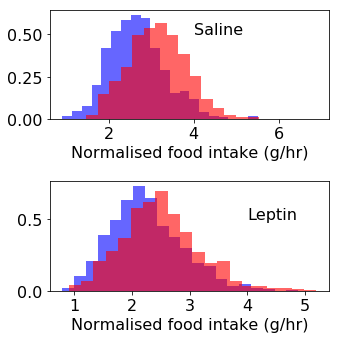

In [4]:
reload(plots)
reload(helpers)

indivs = ['saline_0.0_A_D_trace.p',
          'Lep_2.0_A_D_trace.p']

fig, axes = plots.param_change_effect(group_dict,
                                      indivs,
                                      4, 
                                      0.5, 
                                      num_samples=1000,
                                      duration=3*60*60)

axes[0].set_xlabel('Normalised food intake (g/hr)')
axes[1].set_xlabel('Normalised food intake (g/hr)')

axes[0].text(4, 0.5, 'Saline')
axes[1].text(4, 0.5, 'Leptin')

## Save figure
fig.tight_layout()
plt.savefig('figures/4C.svg')

plt.show()

## Figure 4 E/F: Pairwise parameter perturbations

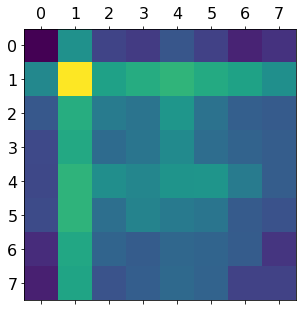

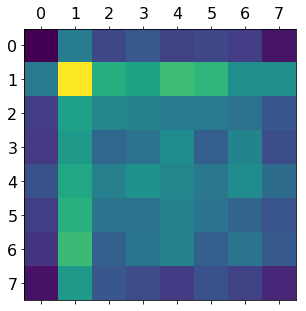

In [5]:
reload(plots)
reload(helpers)

fig, axes = plots.pairwise_param_changes(group_dict,
                                         'saline_0.0_A_D_trace.p',
                                         delta=0.1,
                                         num_samples=100,
                                         duration=8*60*60)

fig2, axes2 = plots.pairwise_param_changes(group_dict,
                                           'saline_0.0_R_D_trace.p',
                                           delta=0.1,
                                           num_samples=100,
                                           duration=8*60*60)

plt.show()

## Figure 4G: Parameter delta curve - in silico replication of CGRP neuron silencing indicates that the feeding reduction effect cannot solely be down to meal size reduction: feeding rate reduction, within-bout pause duration, or bout duration must also be affected

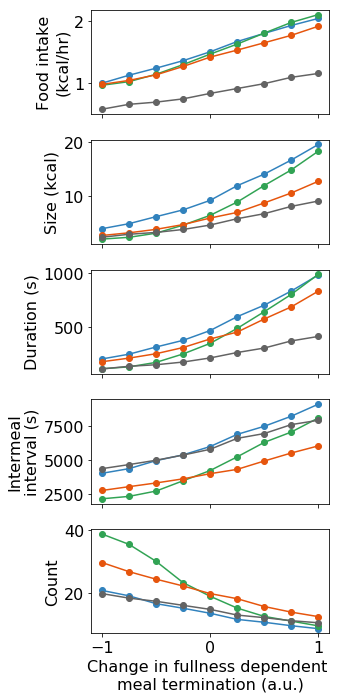

In [6]:
reload(plots)
reload(helpers)
"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p']

"""
indivs = ['saline_0.0_R_D_trace.p',
          'saline_0.0_A_D_trace.p']

"""
fig, axes = plots.param_delta_curve(group_dict,
                                    indivs,
                                    4,
                                    np.linspace(-1, 1, 9),
                                    num_samples=100,
                                    duration=24*60*60)

axes[4].set_xlabel('Change in fullness dependent \nmeal termination (a.u.)')
axes[0].set_ylabel('Food intake\n(kcal/hr)')
axes[1].set_ylabel('Size (kcal)')
axes[2].set_ylabel('Duration (s)')
axes[3].set_ylabel('Intermeal\ninterval (s)')
axes[4].set_ylabel('Count')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
axes[3].set_xticklabels([])

## Save figure
fig.tight_layout()
plt.savefig('figures/4D.svg')

plt.show()

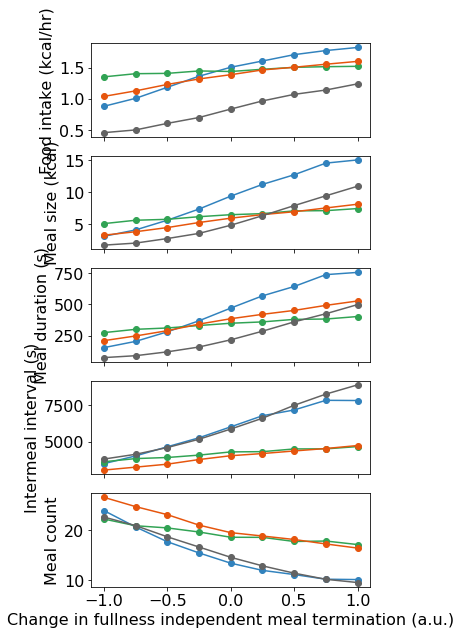

In [7]:
reload(plots)
reload(helpers)
"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p']

"""
indivs = ['saline_0.0_R_D_trace.p',
          'saline_0.0_A_D_trace.p']

"""
fig, axes = plots.param_delta_curve(group_dict,
                                    indivs,
                                    3,
                                    np.linspace(-1, 1, 9),
                                    num_samples=100,
                                    duration=24*60*60)

axes[4].set_xlabel('Change in fullness independent meal termination (a.u.)')
axes[0].set_ylabel('Food intake (kcal/hr)')
axes[1].set_ylabel('Meal size (kcal)')
axes[2].set_ylabel('Meal duration (s)')
axes[3].set_ylabel('Intermeal interval (s)')
axes[4].set_ylabel('Meal count')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
axes[3].set_xticklabels([])

## Save figure
#fig.tight_layout()
plt.savefig('figures/4E.svg')

plt.show()

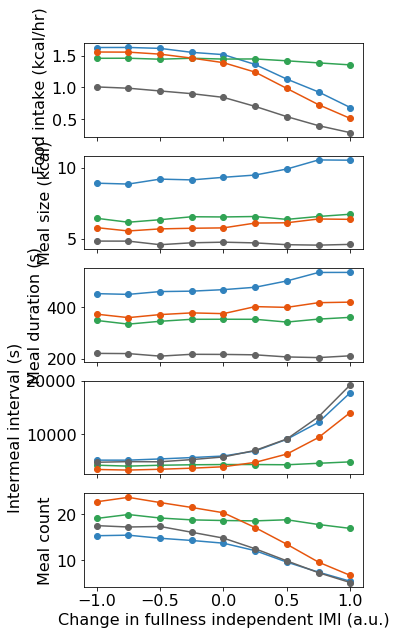

In [8]:
reload(plots)
reload(helpers)
"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p']

"""
indivs = ['saline_0.0_R_D_trace.p',
          'saline_0.0_A_D_trace.p']

"""
fig, axes = plots.param_delta_curve(group_dict,
                                    indivs,
                                    6,
                                    np.linspace(-1, 1, 9),
                                    num_samples=100,
                                    duration=24*60*60)

axes[4].set_xlabel('Change in fullness independent IMI (a.u.)')
axes[0].set_ylabel('Food intake (kcal/hr)')
axes[1].set_ylabel('Meal size (kcal)')
axes[2].set_ylabel('Meal duration (s)')
axes[3].set_ylabel('Intermeal interval (s)')
axes[4].set_ylabel('Meal count')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
axes[3].set_xticklabels([])

## Save figure
#fig.tight_layout()
plt.savefig('figures/4F.svg')

plt.show()

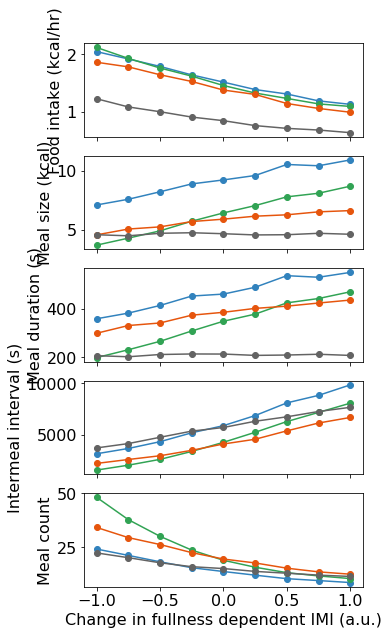

In [9]:
reload(plots)
reload(helpers)
"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p']

"""
indivs = ['saline_0.0_R_D_trace.p',
          'saline_0.0_A_D_trace.p']

"""
fig, axes = plots.param_delta_curve(group_dict,
                                    indivs,
                                    7,
                                    np.linspace(-1, 1, 9),
                                    num_samples=100,
                                    duration=24*60*60)

axes[4].set_xlabel('Change in fullness dependent IMI (a.u.)')
axes[0].set_ylabel('Food intake (kcal/hr)')
axes[1].set_ylabel('Meal size (kcal)')
axes[2].set_ylabel('Meal duration (s)')
axes[3].set_ylabel('Intermeal interval (s)')
axes[4].set_ylabel('Meal count')

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
axes[3].set_xticklabels([])

## Save figure
#fig.tight_layout()
plt.savefig('figures/4G.svg')

plt.show()

## Figure 4H: Parameter perturbations mimic the effect of CGRP silencing

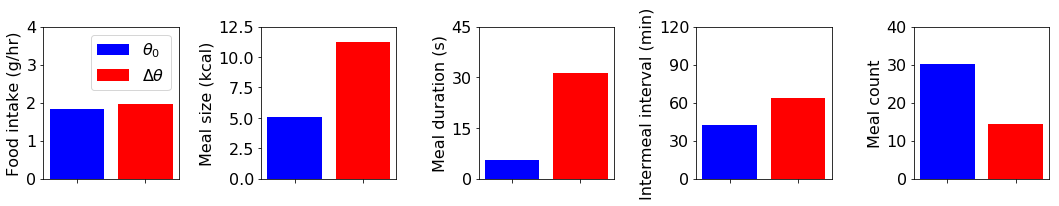

In [10]:
reload(plots)
reload(helpers)

indivs = 'saline_0.0_A_D_trace.p'

fig, axes = plots.meal_stats_from_delta(group_dict,
                                        indivs,
                                        [1,3,4], 
                                        [-0.5,2,1], 
                                        num_samples=100,
                                        duration=24*60*60,
                                        figsize=(15,3))

axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
axes[3].set_xticklabels([])
axes[4].set_xticklabels([])

axes[0].set_ylabel('Food intake (g/hr)')
axes[1].set_ylabel('Meal size (kcal)')
axes[2].set_ylabel('Meal duration (s)')
axes[3].set_ylabel('Intermeal interval (min)')
axes[4].set_ylabel('Meal count')

axes[0].yaxis.set_ticks([0,1,2,3,4])
axes[1].yaxis.set_ticks([0,2.5, 5, 7.5, 10, 12.5])
axes[2].yaxis.set_ticks([0,15,30,45])
axes[3].yaxis.set_ticks([0,30,60,90,120])
axes[4].yaxis.set_ticks([0,10,20,30,40])

## Save figure
fig.tight_layout()
plt.savefig('figures/4H.svg')

plt.show()